# Import

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import warnings
import json
from warnings import simplefilter
warnings.filterwarnings("ignore")
simplefilter("ignore", category=RuntimeWarning)

Ссылка на соревнования: https://zindi.africa/competitions/ai4d-lab-tanzania-tourism-classification-challenge

**Описание**

Задача: Набор данных описывает актуальную информацию о туристических расходах, собранных Национальным бюро статистики (НБС) Танзании. Набор данных был собран, чтобы лучше понять состояние сектора туризма и предоставить инструмент, который будет обеспечить рост отрасли.
    
Цель: классифицировать диапазон расходов, который туристическая группа тратит в Танзании, чтобы автоматически помочь туристам со всего мира оценить свои расходы перед посещением Танзании.   

Оценка: показателем оценки для этой задачи является ***logloss*** 

***Признаки***
 
 **id** -  Unique identifier for each tourist (Уникальный идентификатор для каждого туриста)
 
**country** -  The country a tourist coming  from (Страна, из которой приехал турист)

**age_group** -  The age group of a tourist (Возрастная группа туриста)

**travel_with** -  The relation of people a tourist travel with to Tanzania (Отношение людей, с которыми путешествуют туристы по Танзании)

**total_female** -  Total number of females (Общее количество женщин)

**total_male** -  Total number of males (Общее количество мужчин)

**purpose** -  The purpose of visiting  Tanzania (Цель посещения Танзании)

**main_activity** -  The main activity of tourism in Tanzania (Основное направление туризма в Танзании)

**infor_source** -  The source of information about tourism in Tanzania (Источник информации о туризме в Танзании)

**tour_arrangment** -  The arrangment of visiting Tanzania (Организация посещения Танзании)

**package_transport_int** -  If the tour package include international transportation service (Если турпакет включает международные перевозки)

**package_accomodation** -  If the tour package include accommodation service (Если в турпакет входит услуга проживания)

**package_food** -  If the tour package include food service (Если в турпакет включено питание)

**package_transport_tz** -  If the tour package include transport service within Tanzania (Если турпакет включает транспортное обслуживание в пределах Танзании)

**package_sightseeing** -  If the tour package include sightseeing service (Если турпакет включает экскурсионное обслуживание)

**package_guided_tour** -  If the tour package include tour guide (Если турпакет включает гида)

**package_insurance** -  if the tour package include insurance service (если турпакет включает страховку)

**night_mainland** -  Number of nights a tourist spent in Tanzania mainland (Количество ночей, проведенных туристом на материковой части Танзании)

**night_zanzibar** -  Number of nights a tourist spent in Zanzibar (Количество ночей, проведенных туристом на Занзибаре)
*Занзибар - остров 

**first_trip_tz** -  If it was a first  trip to Tanzania (Если бы это была первая поездка в Танзанию)

**cost_category** -  The range of expenditures a tourist spends in Tanzania (Диапазон расходов, которые турист тратит в Танзании)

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# train dataset
df = pd.read_csv('E:/Pet_project/Tourism Classification Challenge/Train.csv')

In [4]:
df.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,No,6,6,Yes,Higher Cost
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,3,0,No,Lower Cost
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,No,Yes,Yes,7,0,Yes,Higher Cost


# EDA

In [5]:
# размер датасета
df.shape

(18506, 21)

In [6]:
# основная информация по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tour_ID                18506 non-null  object 
 1   country                18506 non-null  object 
 2   age_group              18506 non-null  object 
 3   travel_with            17431 non-null  object 
 4   total_female           18504 non-null  float64
 5   total_male             18500 non-null  float64
 6   purpose                18506 non-null  object 
 7   main_activity          18506 non-null  object 
 8   info_source            18506 non-null  object 
 9   tour_arrangement       18506 non-null  object 
 10  package_transport_int  18506 non-null  object 
 11  package_accomodation   18506 non-null  object 
 12  package_food           18506 non-null  object 
 13  package_transport_tz   18506 non-null  object 
 14  package_sightseeing    18506 non-null  object 
 15  pa

В колонке main_activity есть повторение категорий 'Wildlife Tourism' и 'Widlife Tourism'. 
Необходимо исправить орфографическую ошибку, чтобы убрать дополнительное разделение

In [7]:
df.main_activity.unique()

array(['Beach Tourism', 'Wildlife Tourism', 'Widlife Tourism',
       'Cultural Tourism', 'Bird Tourism', 'Hunting Tourism',
       'Conference Tourism', 'Mountain Climbing', 'Business',
       'Diving and Sport Fishing'], dtype=object)

In [8]:
def activity_correct(data: pd.DataFrame, name_column: str = 'main_activity'):
    data[name_column] = np.where((data[name_column] == 'Widlife Tourism'),
                                 'Wildlife Tourism', data['main_activity'])

In [9]:
activity_correct(df)

Проверяю пропуски в датасете. При необходимости заполняю их

In [10]:
df.isna().sum()

Tour_ID                     0
country                     0
age_group                   0
travel_with              1075
total_female                2
total_male                  6
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
first_trip_tz               0
cost_category               0
dtype: int64

In [11]:
# функция для заполнения пропусков: медианой для числовых столбцов, None для категориальных
def filling_in_gaps(data):

    list_data_columns = data.isna().sum().reset_index().rename(columns={
        'index': 'col_name',
        0: 'cnt'
    })

    list_columns_zero = list(
        (list_data_columns[list_data_columns.iloc[:, 1] != 0]['col_name']))

    for i in list_columns_zero:
        if data[i].dtype == 'int' or data[i].dtype == 'float':
            data[i].fillna(data[i].median(), inplace=True)
        else:
            data[i].fillna('None', inplace=True)

    return data.isna().sum()

In [12]:
filling_in_gaps(df)

Tour_ID                  0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
first_trip_tz            0
cost_category            0
dtype: int64

Смотрю статистики для числовых и категорильных данных

In [13]:
df.describe()

,total_female,total_male,night_mainland,night_zanzibar
count,18506.000000,18506.000000,18506.000000,18506.000000
mean,0.936237,0.998757,9.141576,2.493516
std,1.215516,1.172986,14.127449,5.275156
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,0.000000
50%,1.000000,1.000000,6.000000,0.000000
75%,1.000000,1.000000,11.000000,4.000000
max,49.000000,58.000000,365.000000,240.000000


In [14]:
df.describe(include='object')

,Tour_ID,country,age_group,travel_with,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,first_trip_tz,cost_category
count,18506,18506,18506,18506,18506,18506,18506,18506,18506,18506,18506,18506,18506,18506,18506,18506,18506
unique,18506,131,5,6,8,9,8,2,2,2,2,2,2,2,2,2,6
top,tour_id1hffseyw,UNITED STATES OF AMERICA,25-44,Alone,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,No,No,No,No,No,No,No,Yes,Normal Cost
freq,1,2846,9047,7590,11755,8271,8005,9295,12238,9541,10143,10873,12786,12447,15809,12737,5471


**Вывод по статистикам:** в основном люди едут в одиночку для дикого туризма/сафари, покупая туры. Медианное значение количества дней прибывания в стране - 6. В основном поездка ограничивается материковой частью страны.

Есть выбросы по количеству проведенных дней и людей в одной группе

Так как есть орфографисеские ошибки в названиях стран, то необходимо их убрать

In [15]:
def spelling_mistake(data:pd.DataFrame):
    
    data.loc[data['country']=='netherlands', 'country'] = 'the netherlands'
    data.loc[data['country']=='swizerland', 'country'] = 'switzerland'
    data.loc[data['country']=='morroco', 'country'] = 'morocco'
    data.loc[data['country']=='uae', 'country'] = 'united arab emirates'
    data.loc[data['country']=='luxembourg', 'country'] = 'luxemburg'
    data.loc[data['country']=='romania', 'country'] = 'rumania'
    data.loc[data['country']=='malt', 'country'] = 'malta'
    data.loc[data['country']=='comoro', 'country'] = 'comoros'
    data.loc[data['country']=='saud arabia', 'country'] = 'saudi arabia'
    data.loc[data['country']=='scotland', 'country'] = 'united kingdom'
    data.loc[data['country']=='ukrain', 'country'] = 'ukraine'
    data.loc[data['country']=='somali', 'country'] = 'somalia'
    data.loc[data['country']=='ecuado', 'country'] = 'ecuador'
    data.loc[data['country']=='cape verde', 'country'] = 'cabo verde'
    data.loc[data['country']=='monecasque', 'country'] = 'monaco'
    data.loc[data['country']=='trinidad tobacco', 'country'] = 'trinidad and tobago'
    data.loc[data['country']=='burgaria', 'country'] = 'bulgaria'
    data.loc[data['country']=='djibout', 'country'] = 'djibouti'

Далее необходимо посмотреть на распределение целевой переменой, чтобы проверить дисбаланс классов

In [16]:
# функция для расположения процентных значений на графике
def plot_text(ax, rotation=0, xytext=(0, 20), fontsize=14):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='center',
                    xytext=xytext,
                    textcoords='offset points',
                    rotation=rotation,
                    fontsize=fontsize)

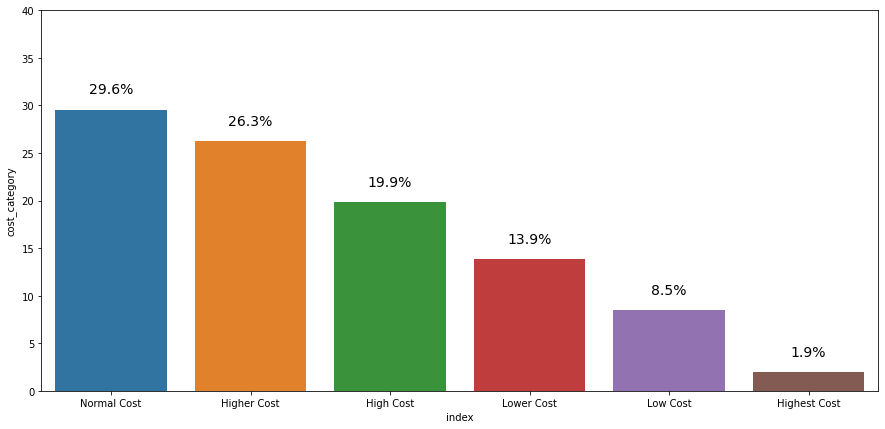

In [17]:
norm_target = (df.cost_category.value_counts(
    normalize=True).mul(100).reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='cost_category', data=norm_target)
plt.ylim(top=40)
plot_text(ax)

**Вывод:** из графика следует, что есть дисбаланс классов. При дисбалансе следует учитывать настройку гиперпараметров модолей, например, class_weight

# Гипотезы

## Зависит ли ценовая категория группы от ее возраста ?

Возможно, с увеличением возраста люди больше тратят денег, так как больше зарабатывают и предпочитают больше комфорта в поездке

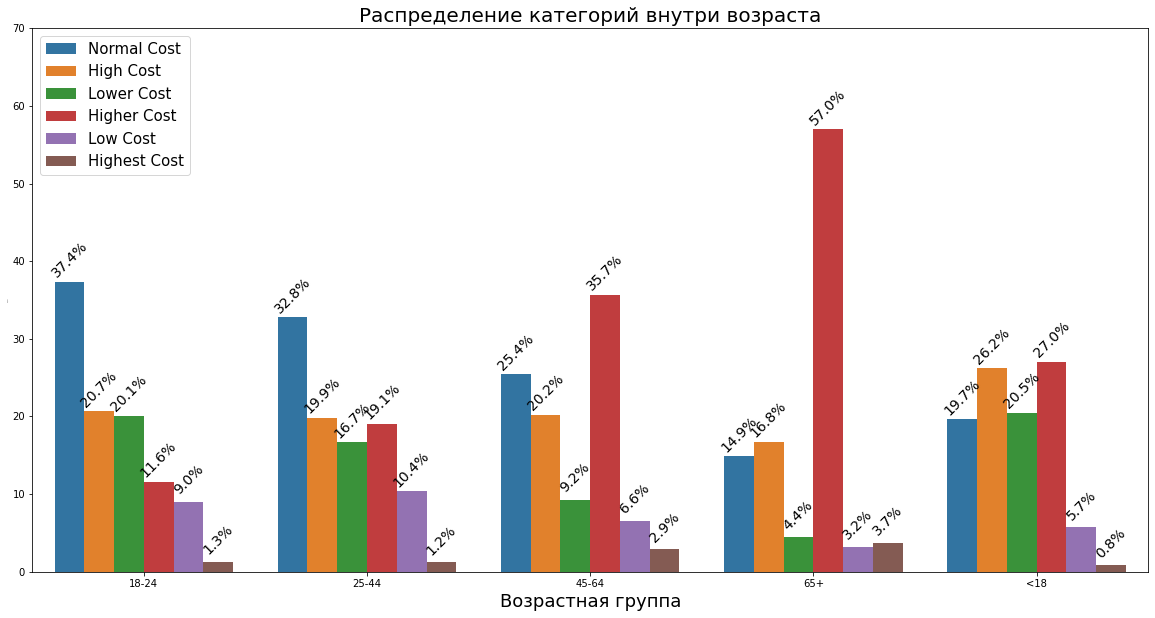

In [18]:
plt.figure(figsize=(20, 10))

age_d = df.groupby(['age_group']).cost_category.value_counts(
    normalize=True).mul(100).rename('N').reset_index()
w = sns.barplot(
    x='age_group',
    y='N',
    data=age_d,
    hue='cost_category',
)
plot_text(w, 45, (0, 22), 14)
plt.title('Распределение категорий внутри возраста', fontsize=20)
plt.ylabel('Процент', fontsize=1)
plt.xlabel('Возрастная группа', fontsize=18)
plt.legend(loc="upper left", fontsize=15)
plt.ylim(top=70)

plt.show()

**Вывод:** из графика следует, что более возрастнные группы (45+) оставляют больше денег, чем остальные. Гипотеза подтвердилась.

Также видно, что возрастная категория <18 тоже имеет большую долю высокой ценовой категории. Возможно,что это связано с тем, что детям оплачивают поездку родители, тогда как категории 18-24 и 25-44 вынуждены сами оплачиваеть поездку.

## Как влияет количество людей в туристической группе на ее затраты?

Возможно, что при увеличении кол-ва людей в туристической группе они суммарно оставляют больше денег, чем один человек, прибывший в страну

Для этого создам дополнительную колонку в копии тренировочного датасета 

In [19]:
df['total_person'] = df['total_female'] + df['total_male']

Необходимо посмотреть медианы и средние по каждой ценовой категории

In [20]:
# функция для расположения числовых значений на графике
def plot_text_cnt(ax):
    for p in ax.patches:
        percentage = '{:.1f}'.format(p.get_height())
        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 10),
                    textcoords='offset points',
                    fontsize=14)

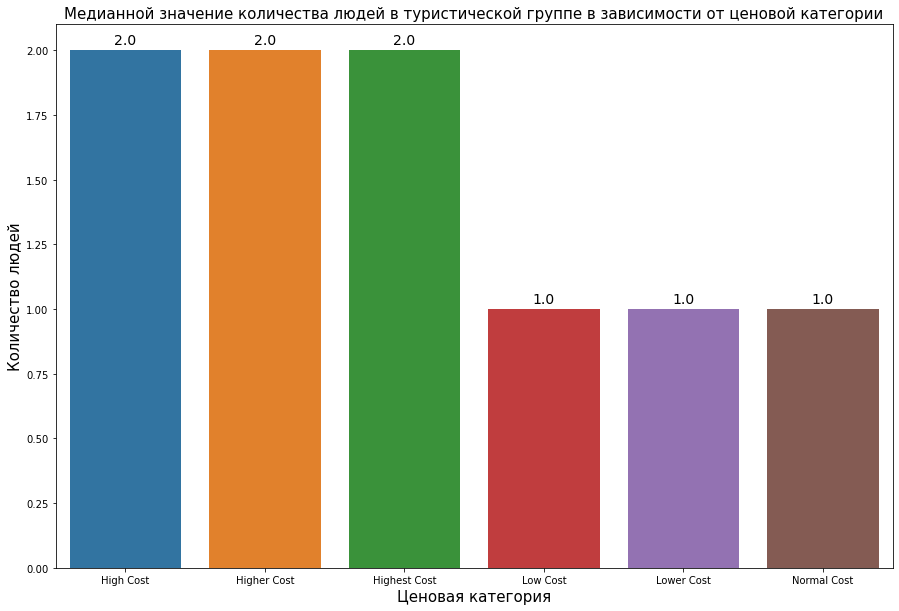

In [21]:
#медианные значения количества людей в каждой категории
plt.figure(figsize=(15, 10))

data_2 = df.groupby(['cost_category'
                          ]).median().reset_index().sort_values('total_person',
                                                              ascending=False)

ax1 = sns.barplot(data=data_2, y='total_person', x='cost_category')
plt.title(
    'Медианной значение количества людей в туристической группе в зависимости от ценовой категории',
    fontsize=15)
plt.xlabel('Ценовая категория', fontsize=15)
plt.ylabel('Количество людей', fontsize=15)

plot_text_cnt(ax1)

plt.show()

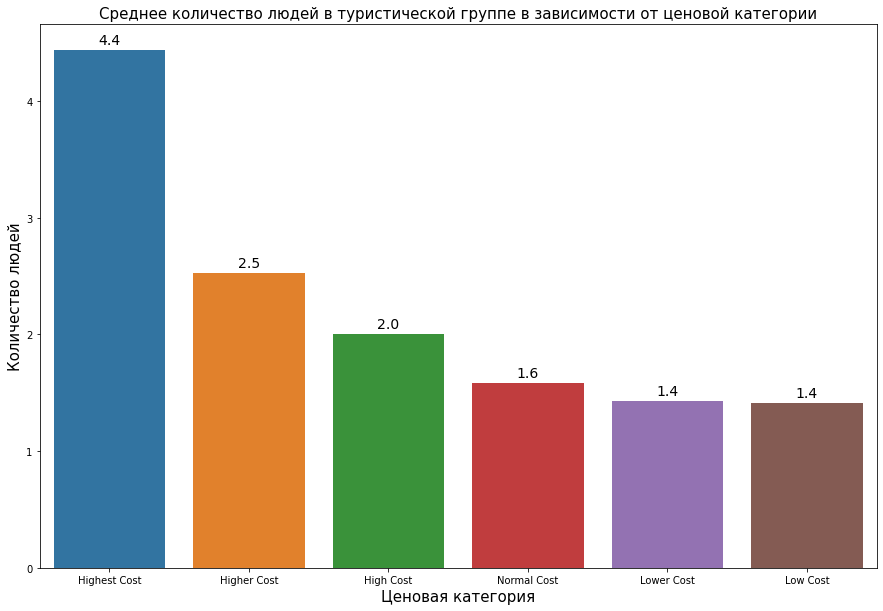

In [22]:
# средние значения количества людей в каждой категории
plt.figure(figsize=(15, 10))

data_2 = df.groupby(['cost_category'
                          ]).mean().reset_index().sort_values('total_person',
                                                              ascending=False)

ax1 = sns.barplot(data=data_2, y='total_person', x='cost_category')
plt.title(
    'Среднее количество людей в туристической группе в зависимости от ценовой категории',
    fontsize=15)
plt.xlabel('Ценовая категория', fontsize=15)
plt.ylabel('Количество людей', fontsize=15)

plot_text_cnt(ax1)

plt.show()

**Вывод:** возможно, что количество людей в туристической группе влияет на количество потраченных денег. Чем больше группа, тем больше денег она принесет

## Как влияет страна (континент), из которой прибыла туристическая группа, на количество денег, которая она потратила

Возможно, что из стран Европы и Северной Америки приезжает больше туристов, которые оставляют больше денег по сравнению с остальными континентами, т.к. уровень развития стран Европы и Сев. Америки выше, выше зарпалты.

Создаю списки стран по континетам, для отнесения каждой страны в датасете к определенному континенту

In [23]:
europe = [
    'Albania', 'Andorra', 'Austria', 'Byelorussia', 'Belgium',
    'Bosnia', 'Bulgaria', 'Croatia', 'Czech Republic',
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
    'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania',
    'Luxemburg', 'Macedonia', 'Malta', 'Moldavia', 'Monaco', 'Montenegro',
    'the Netherlands', 'Norway', 'Poland', 'Portugal', 'Rumania', 'Russia',
    'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
    'Ukraine', 'United-Kingdom'
]
europe = [i.lower().replace('-', ' ') for i in europe]

In [24]:
asia = [
    'Abkhazia', 'Azerbaijan', 'Armenia', 'Afghanistan', 'Bangladesh',
    'Bahrain', 'Brunei', 'Bhutan', 'East', 'Timor', 'Vietnam', 'Georgia',
    'Israel', 'India', 'Indonesia', 'Jordan', 'Iraq', 'Iran', 'Yemen',
    'Kazakhstan', 'Cambodia', 'Qatar', 'Cyprus', 'China', 'Kuwait',
    'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia',
    'Myanmar', 'Nepal', 'United-Arab-Emirates', 'Oman', 'Pakistan',
    'Saudi-Arabia', 'Singapore', 'Syria', 'North-Korea', 'Tajikistan', 'Thailand',
    'Taiwan', 'Turkmenistan', 'Turkey', 'Uzbekistan,', 'Philippines', 'Sri-Lanka', 'Korea', 'Japan'
]
asia = [i.lower().replace('-', ' ') for i in asia]

In [25]:
north_america = [
    'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada',
    'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'Grenada',
    'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua',
    'Panama', 'Saint Kitts and Nevis', 'Saint Lucia',
    'Saint-Vincent-and-the Grenadines', 'Salvador', 'Trinidad-and-Tobago',
    'United States of America'
]
north_america = [i.lower().replace('-', ' ') for i in north_america]

In [26]:
south_america = [
    'Argentina', 'Bolivia', 'Brazil', 'Venezuela', 'Gviana', 'Guyana',
    'Colombia', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Chile', 'Ecuador'
]
south_america = [i.lower().replace('-', ' ') for i in south_america]

In [27]:
africa = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina', 'Faso', 'Burundi',
    'Cabo Verde', 'Cameroon', 'Central-African-Republic', 'Chad', 'Comoros',
    'Congo-Democratic-Republic', 'Congo', 'Cote-d’Ivoire', 'Djibouti', 'Egypt',
    'Equatorial-Guinea', 'Eritrea', 'Swaziland', 'Ethiopia', 'Gabon', 'Gambia',
    'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
    'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco',
    'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
    'Sao-Tome-and-Principe', 'Senegal', 'Seychelles', 'Sierra-Leone',
    'Somalia', 'South-Africa', 'South-Sudan', 'Sudan', 'Tanzania', 'Togo',
    'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
]
africa = [i.lower().replace('-', ' ') for i in africa]

Далее создаю в датасете признак континент - **continent**

In [28]:
# привожу к одному регистру названия стран, чтобы легче было работать
def lower_case(data, column):
    data[column] = data[column].str.lower()

In [29]:
lower_case(df, 'country')

In [30]:
dict_country = {
    'EU': europe,
    'AS': asia,
    'NA': north_america,
    'SA': south_america,
    'AF': africa
}
# изначально устанавливаю континент 'other'
df['continent'] = 'other'

for idx, strana in enumerate(df.country.values.tolist()):
    for key, values in dict_country.items():
        if strana in values:
            df['continent'][idx] = key

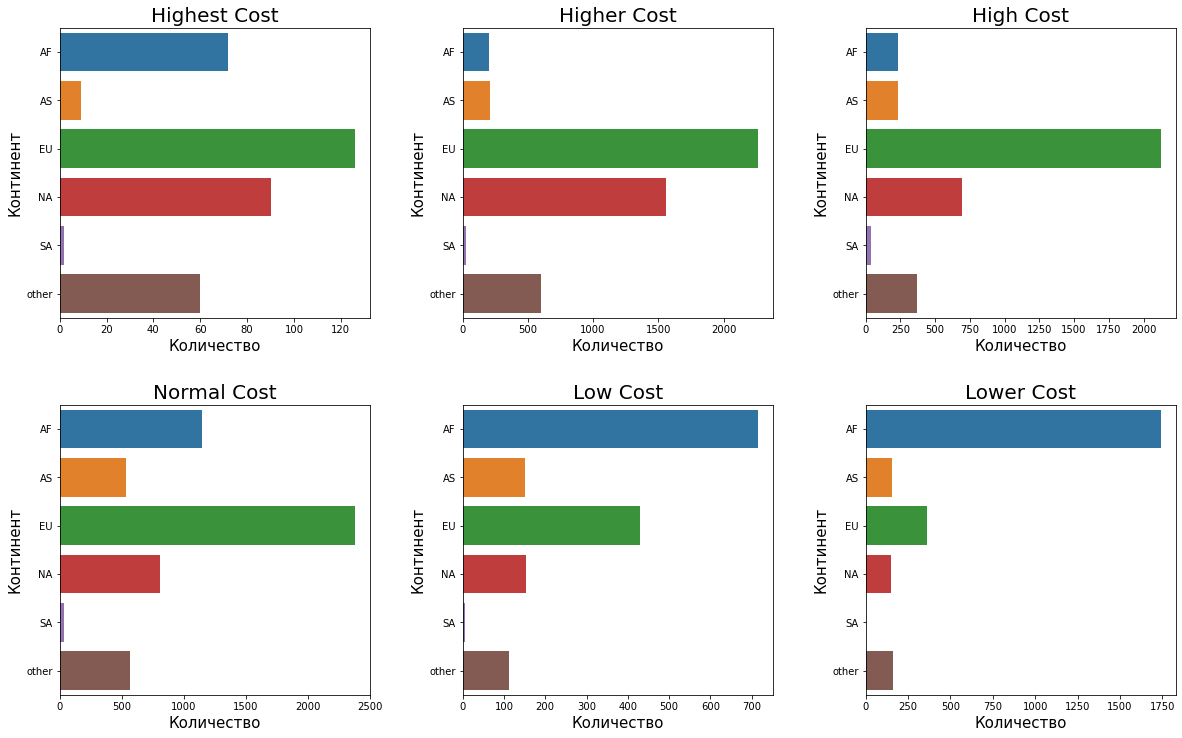

In [31]:
# отсортированный cписок ценовых категорий
list_categories = [
    'Highest Cost', 'Higher Cost', 'High Cost', 'Normal Cost', 'Low Cost',
    'Lower Cost'
]
# кол-во категорий для выбора кол-ва строк в графике
total_ax = len(df['cost_category'].unique())
plt.figure(figsize=(20, 40))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for cnt, i in enumerate(list_categories):
    cnt += 1
    plt.subplot(total_ax, 3, cnt)
    sns.countplot(y="continent",
                  data=df.loc[df['cost_category'] == i].sort_values(
                      by=['continent']))
    plt.title(i, fontsize=20)
    plt.xlabel('Количество', fontsize=15)
    plt.ylabel('Континент', fontsize=15)

Теперь посмотрим на соотношение количества типов групп с каждого континента

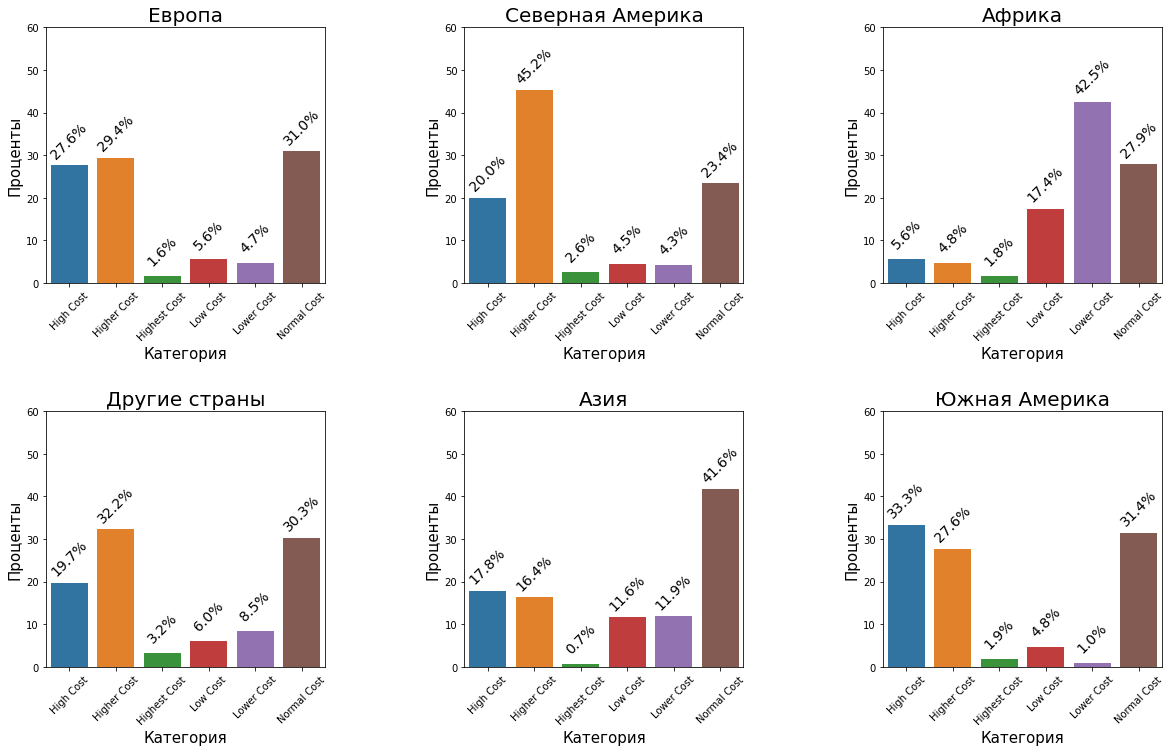

In [32]:
plt.figure(figsize=(20, 40))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
list_continents = {
    'EU': 'Европа',
    'NA': 'Северная Америка',
    'AF': "Африка",
    'other': "Другие страны",
    'AS': "Азия",
    'SA': "Южная Америка"
}
len_continents = len(list_continents)

for cnt, i in enumerate(list_continents.keys()):
    cnt += 1
    plt.subplot(len_continents, 3, cnt)

    data_1 = pd.DataFrame(df[df['continent'] == i].groupby(
        ['continent'])['cost_category'].value_counts(
            normalize=True).sort_index().mul(100)).rename(
                columns={
                    'cost_category': 'Percent'
                }).reset_index().drop(['continent'], axis=1)

    ax = sns.barplot('cost_category', 'Percent', data=data_1)

    plt.title(list_continents[i], fontsize=20)
    plt.xlabel('Категория', fontsize=15)
    plt.ylabel('Проценты', fontsize=15)
    plt.ylim(top=60)
    plt.xticks(rotation=45)

    plot_text(ax, 45, (0, 25))

**Вывод:** из стран Европы, Северной и Южной Америк в основном едут обеспеченные туристы, которые оставляют много денег

Из Африки в основном приезжают туристы, которые оставляют мало денег

Возможно, это следует из-за уровня развития региона

## Зависит ли отнесение туристической группу к той или иной категории от цели визита?

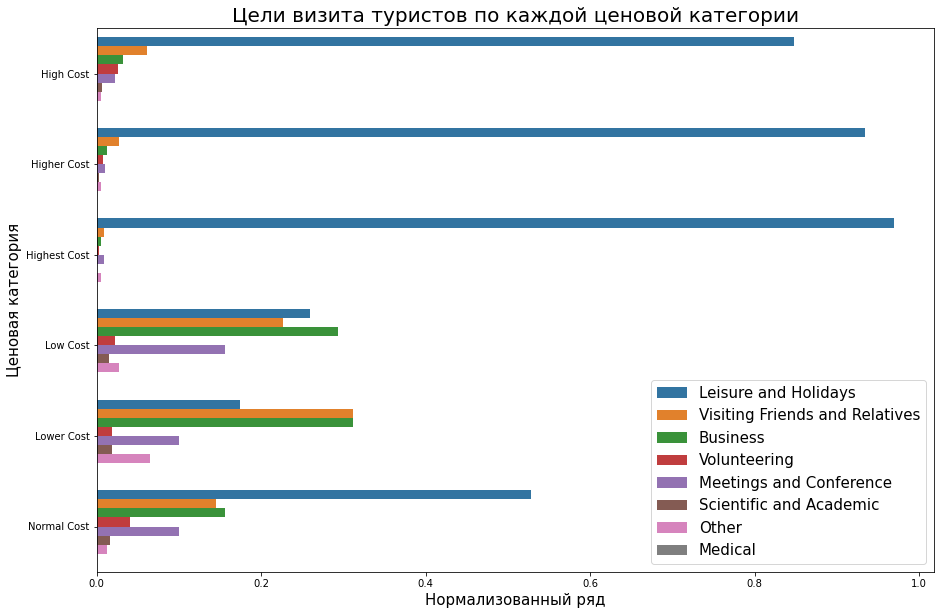

In [33]:
plt.figure(figsize=(15, 10))

norm_data = df.groupby([
    'cost_category'
]).purpose.value_counts(normalize=True).rename('Norm').reset_index()

sns.barplot(y='cost_category', x='Norm', data=norm_data, hue='purpose')
plt.title('Цели визита туристов по каждой ценовой категории', fontsize=20)
plt.ylabel('Ценовая категория', fontsize=15)
plt.xlabel('Нормализованный ряд', fontsize=15)
plt.legend(loc="lower right", fontsize=15)

plt.show()

**Вывод:** туристические группы, которые относятся к Highest, Higher, High cost, в основном приезжают для проведения отпуска. Значит, если цель группы отдых, то скорее всего она потратит больше денег, чем в случае иной цели визита.

## Зависит ли отнесение туристической группу к той или иной категории  от основного занятия в поездке?

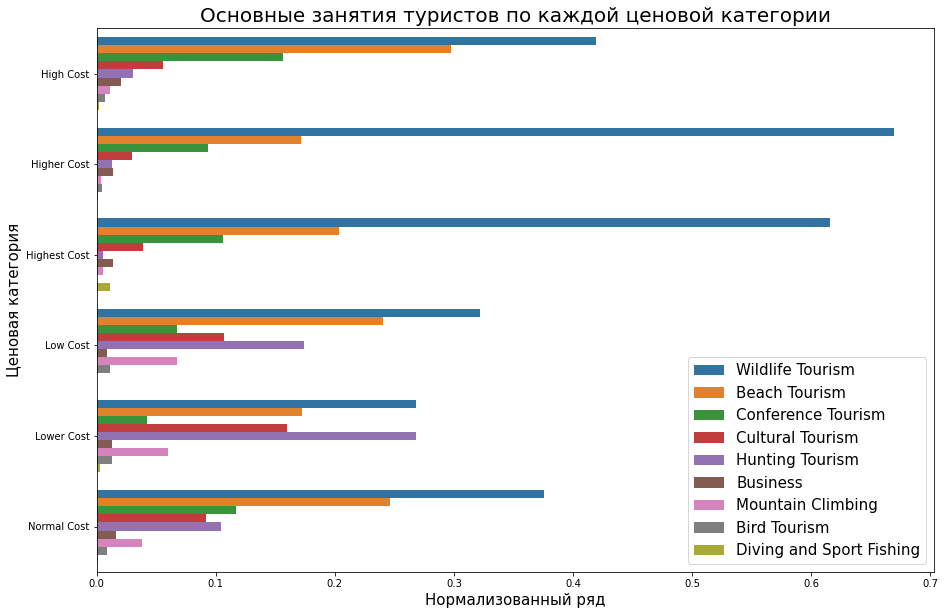

In [34]:
plt.figure(figsize=(15, 10))

norm_data = df.groupby([
    'cost_category'
]).main_activity.value_counts(normalize=True).rename('Norm').reset_index()

sns.barplot(y='cost_category', x='Norm', data=norm_data, hue='main_activity')
plt.title('Основные занятия туристов по каждой ценовой категории', fontsize=20)
plt.ylabel('Ценовая категория', fontsize=15)
plt.xlabel('Нормализованный ряд', fontsize=15)
plt.legend(loc="lower right", fontsize=15)
plt.show()

**Вывод:** WildLife tourism является наиболее распространненной целью визита, и количество категорий High, Higher, Highest преобладает над другими категориями в разрезе основного занятия тур.группы 

## Как зависит категория туристической группы от количества проведенных дней в стране?

Вначале создаю дополнительный признак 'total_day' в датасете

In [35]:
df['total_day'] = df['night_mainland'] + df['night_zanzibar']

In [36]:
df['total_day'].unique()

array([  7,  12,   3,  21,   4,  60,   6,  25,  26,  18,  15,  14,   8,
         2,   5,  17,  20,  10,  11,  13,  16,   1,  29,  67,  77,  27,
        28,  24,   9,  23, 100,  42,  30,  35,  74,  44,  45,  56, 120,
        19,  61,  22,  39,  52,  33, 108,  38,  90,  59,  63,  71, 248,
        34,  70,  75,  62,  32,  86,  40,  54,  36,  85,  48,  37,  31,
        49, 180, 300,  43, 181,  58,  68,  88, 288,  50,  95,  64,  47,
       118,  92,  69, 279,  55,  57,  46, 125, 365,  89, 240, 213,  76,
        93, 104,  84,  53, 110,  79,  80,  83,  65, 150, 164, 126,  51,
       107,  94, 145, 182,  87, 140,  66,  41,  72,  91, 364,  73, 371],
      dtype=int64)

т.к разброс большой необходимо разбить на временные промежутки
- до 7 дней - less 7 days
- от 8 до 14 дней - 8 to 14 days 
- от 15 до 30 дней - 15 to 30 days
- от 31 до 180 дней - 31 to 180 days
- больше 180 дней - more 180 days

In [37]:
df['total_day_bins'] = pd.cut(df['total_day'],
                                   bins=[0, 7, 14, 30, 180, 400],
                                   right=True,
                                   labels=[
                                       "less_7_days", '8_to_14_days',
                                       '15_to_30_days', '31_to_180_days',
                                       'more_180_days'
                                   ])

df.drop(['total_day'], axis=1, inplace=True)

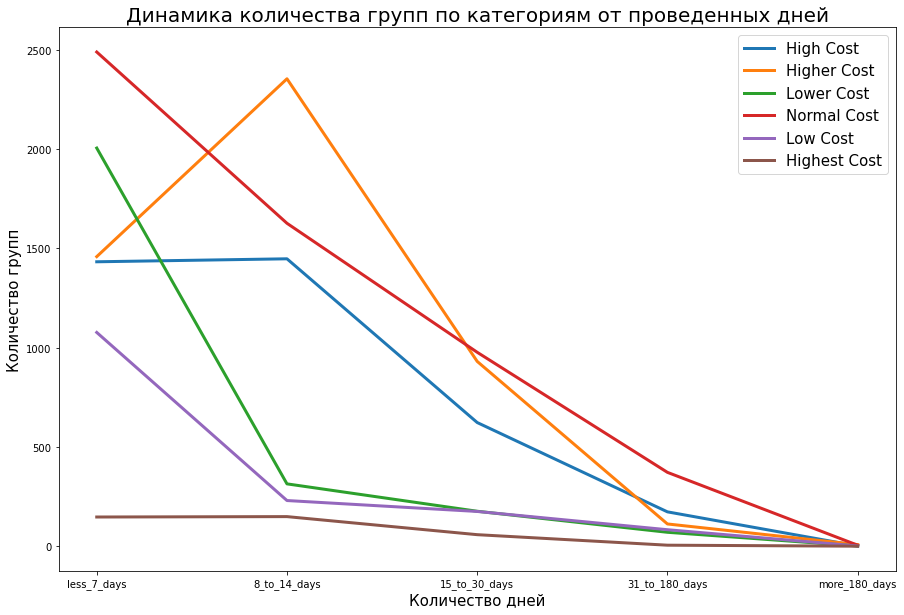

In [38]:
# строю график: зависимости количества каждого вида групп от продолжительности поездки
plt.figure(figsize=(15, 10))
for category in df.cost_category.unique():

    data_3 = df[df['cost_category'] == category].groupby(
        ['cost_category', 'total_day_bins']).count().reset_index()

    sns.lineplot(x='total_day_bins', y='Tour_ID', data=data_3, linewidth=3)
    plt.legend(df.cost_category.unique())
    
plt.legend(df.cost_category.unique(), fontsize = 15)
plt.ylabel('Количество групп', fontsize = 15)
plt.xlabel('Количество дней', fontsize = 15)
plt.title('Динамика количества групп по категориям от проведенных дней', fontsize = 20)
plt.show()

**Вывод:** из графика видно, что при поездке  от 8 до 14 дней, количесвто групп из категорий Highest, Higher  и High увеличивается. Ранее было установлено, что данные категории в основном приезжают для проведения отпуска. Можно сделать вывод, что категории Highest, Higher  и High приезжают на одну-две недели в отпуск

## Зависимость количества опций в туре группы от категории группы

Возможно, чем больше опций в туре, тем больше чек для туристической группы

In [39]:
# замена признаков с типом bool на int
def func_bool_to_int(data: pd.DataFrame, list_cols: list):
    dict_bool = {'Yes': 1, 'No': 0}
    for i in list_cols:
        data[i] = data[i].map(dict_bool)

    return data

In [40]:
list_bool_cols = [i for i in df.columns if 'package' in i]
list_bool_cols.append('first_trip_tz')

In [41]:
df = func_bool_to_int(df, list_bool_cols)

In [42]:
# создаю дополнительный столбец (признак), в котором суммирую все туристические опции
df['tour_option'] = df['package_transport_int'] +\
    df['package_accomodation']+df['package_food'] + \
    df['package_transport_tz'] + \
    df['package_guided_tour']+df['package_insurance']

In [43]:
# нахожу медианные значения количества включенных опций в тур по каждой ценовой категории
df.groupby(['cost_category'])['tour_option'].median().sort_values(ascending=False)

cost_category
Highest Cost    5.0
High Cost       4.0
Higher Cost     4.0
Low Cost        0.0
Lower Cost      0.0
Normal Cost     0.0
Name: tour_option, dtype: float64

**Вывод:** чем больше опций включено в тур (путевку), тем больше денег принест туристическая группа

# Preprocessing train and test datasets

In [44]:
df_test = pd.read_csv(
    'E:/Pet_project/Tourism Classification Challenge/Test.csv')

In [45]:
# удаление вновь созданных признаков + Tour_ID, т.к. все значения уникальны и не несет смысловой нагрузки
df.drop(
    ['Tour_ID', 'continent', 'total_day_bins', 'tour_option', 'total_person'],
    axis=1,
    inplace=True)

In [46]:
# корректировка признака age_group
def age_correct(data: pd.DataFrame, name_column: str = 'age_group'):
    age = {'<18': 0, '18-24': 1, '25-44': 3, '45-64': 4, '65+': 5}
    data[name_column] = data[name_column].map(age)

In [47]:
# замена пробелов и запятых
def symbol_correct(data: pd.DataFrame):
    for i in data.select_dtypes('object').columns.to_list():
        data[i].replace(' ', '_', regex=True, inplace=True)
        data[i].replace(',', '', regex=True, inplace=True)

In [48]:
age_correct(df)
symbol_correct(df)
# обработка test dataset
lower_case(df_test, 'country')
activity_correct(df_test)
filling_in_gaps(df_test)
spelling_mistake(df_test)
func_bool_to_int(df_test, list_bool_cols)
age_correct(df_test)
symbol_correct(df_test)

Прежде чем разбить данные на train и test необходимо бинаризовать датасеты для некоторых алгоритмов, н-р: RandomForest

После подбора лучшей модели следует предсказать на test dataset вероятности классов. Может возникнуть не совпадение количества значений признаков (features) в случае выбора лучшей модели, которой подаются бинаризованные данные. В данном случае буду использовать OneHotEncoder, который позволит одинаково закодировать два датасета.
Обучив алгоритм на тренировочном датасете, закодирую тренировочный и тестовый датасеты.

In [49]:
# выбираю столбца с типом данных object, кроме таргета
object_cols = df.dtypes[df.dtypes == object][:-1].index.to_list()

# добавляю фальшь-столбец для test dataset для совпадения столбцов
df_test['cost_category'] = None

In [50]:
# формирую алгоритм
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False,
                   drop='first',
                   handle_unknown='infrequent_if_exist'), object_cols),
    remainder='passthrough')
# обучаю на тренировочном датасете
transformed = transformer.fit(df)
# формирую закодированный train dataset
data_train = pd.DataFrame(transformer.transform(df),
                          columns=transformer.get_feature_names())
# формирую закодированный test dataset
data_test = pd.DataFrame(transformer.transform(df_test),
                         columns=transformer.get_feature_names())

In [51]:
# кодирую target
enc = LabelEncoder()
df['cost_category'] = enc.fit_transform(df['cost_category'])
data_train['cost_category'] = enc.fit_transform(data_train['cost_category'])
# словарь кат.значение - код.значение
mapping = dict(zip(enc.classes_, range(len(enc.classes_))))

# удаляю фальшь-столбец
data_test.drop(['cost_category'], axis=1, inplace=True)
df_test.drop(['cost_category'], axis=1, inplace=True)

In [52]:
# функция для перевода типа данных столбцов
def new_type(data: pd.DataFrame, was: str, will: str) -> pd.DataFrame:
    data[data.select_dtypes(was).columns] = data[data.select_dtypes(
        was).columns].astype(will)

In [53]:
new_type(data_train, 'object', 'int32')
new_type(data_test, 'object', 'int32')
# для LGBM, CatBoost
new_type(df, 'object', 'category')
new_type(df_test, 'object', 'category')

Сохраняю подготовленные датасеты в формате csv

In [54]:
df.to_csv(
    'E:\Pet_project\Tourism Classification Challenge\Preprocessing_datasets\df.csv',
    index=False)
df_test.to_csv(
    'E:\Pet_project\Tourism Classification Challenge\Preprocessing_datasets\df_test.csv',
    index=False)
data_train.to_csv(
    'E:\Pet_project\Tourism Classification Challenge\Preprocessing_datasets\data_train_bin.csv',
    index=False)
data_test.to_csv(
    'E:\Pet_project\Tourism Classification Challenge\Preprocessing_datasets\data_test_bin.csv',
    index=False)

In [55]:
# запись словаря с кодированием целевой переменной
with open(
        'E:\Pet_project\Tourism Classification Challenge\Preprocessing_datasets\mapping.json',
        "w") as file:
    json.dump(mapping, file)